<a href="https://colab.research.google.com/github/ratuurn/Tugas_CV_Sesi2/blob/main/Ratu_CV2_AnalisaMorfologiCitra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis morfologi pada citra adalah suatu teknik pemrosesan citra yang digunakan untuk mengidentifikasi, mengukur, dan mengubah bentuk dan struktur objek dalam citra.

Erosi: Erosi adalah operasi morfologi yang digunakan untuk menghilangkan elemen-elemen kecil (objek yang memiliki area kecil) dalam citra

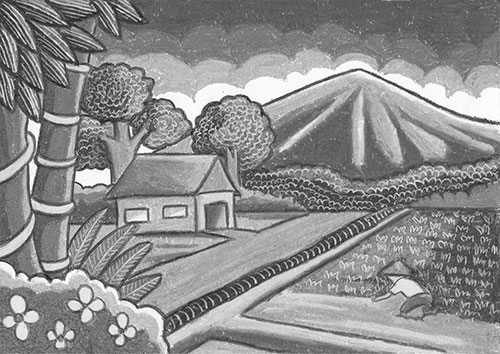

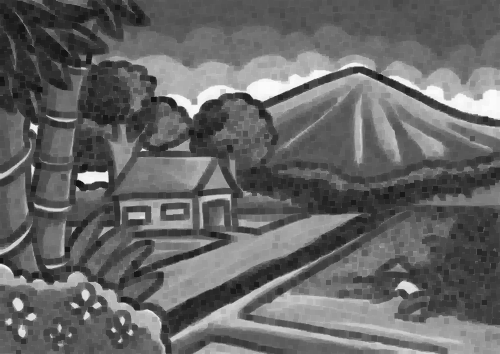

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
img = cv2.imread('ratu1.jpg', 0)  # Ganti 'input_image.jpg' dengan nama citra Anda
cv2_imshow( img)

# Membuat kernel untuk erosi
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan erosi
erosion = cv2.erode(img, kernel, iterations=1)

# Menampilkan citra hasil erosi
cv2_imshow( erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()


Dilasi: Dilasi adalah operasi morfologi yang digunakan untuk memperbesar objek dalam citra.

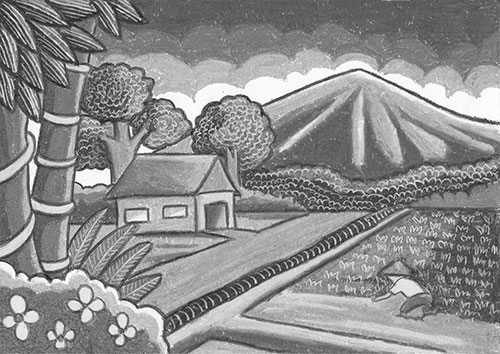

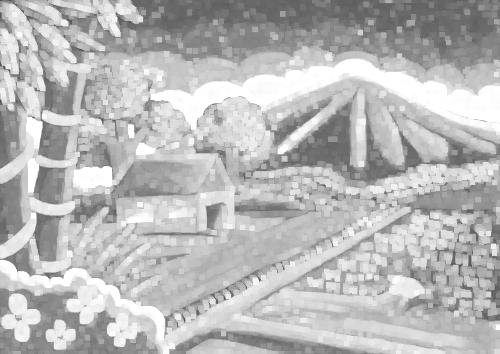

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Baca citra
img = cv2.imread('ratu1.jpg', 0)  # Ganti 'input_image.jpg' dengan nama citra Anda
cv2_imshow( img)

# Membuat kernel untuk dilasi
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan dilasi
dilation = cv2.dilate(img, kernel, iterations=1)

# Menampilkan citra hasil dilasi
cv2_imshow(dilation)

cv2.waitKey(0)
cv2.destroyAllWindows()


Opening adalah operasi morfologi yang menggabungkan erosi dan dilasi. Ini digunakan untuk menghilangkan noise kecil di sekitar objek dan membuka celah-celah kecil dalam objek.


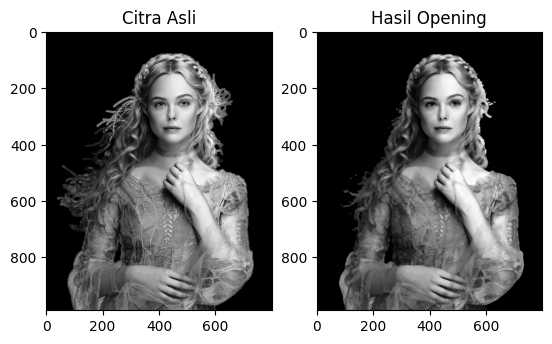

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca citra dari Google Colab
img_path = "Ratu3.png"  # Ganti dengan path citra Anda di Google Colab
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Membuat kernel untuk opening
kernel = np.ones((5, 5), np.uint8)  # Ubah ukuran kernel sesuai kebutuhan

# Melakukan opening
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

# Menampilkan citra asli dan citra hasil opening
plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(opening, cmap='gray'), plt.title('Hasil Opening')
plt.show()


Skeletonization: Ini adalah proses yang digunakan untuk mengurangi objek dalam citra ke representasi paling sederhana, yang disebut sebagai "kerangka" objek. Hal ini berguna dalam pengenalan pola

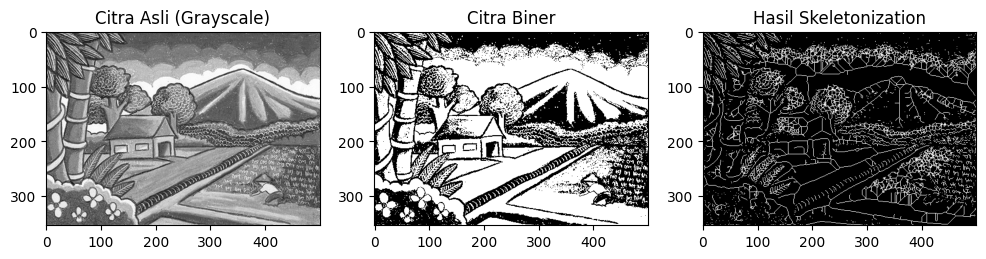

In [4]:
!pip install scikit-image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology

# Baca citra dari URL atau upload dari komputer
img_url = "ratu1.jpg"  # Ganti dengan URL citra Anda atau path lokal
image = io.imread(img_url)

# Ubah citra ke grayscale jika tidak sudah dalam grayscale
gray_image = color.rgb2gray(image)

# Binarisasi citra (mengubah ke citra hitam-putih)
binary_image = gray_image > 0.5  # Anda bisa mengubah nilai ambang sesuai kebutuhan

# Lakukan skeletonization
skeleton = morphology.skeletonize(binary_image)

# Tampilkan citra asli, citra biner, dan hasil skeletonization
plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(gray_image, cmap='gray'), plt.title('Citra Asli (Grayscale)')
plt.subplot(132), plt.imshow(binary_image, cmap='gray'), plt.title('Citra Biner')
plt.subplot(133), plt.imshow(skeleton, cmap='gray'), plt.title('Hasil Skeletonization')
plt.show()


Morfologi Region: Ini adalah operasi morfologi yang digunakan untuk mengidentifikasi dan mengukur properti wilayah dalam citra, seperti luas, keliling, dan bentuk objek.

In [5]:
import cv2
import numpy as np

# Baca citra biner
binary_image = cv2.imread('ratu1.jpg', cv2.IMREAD_GRAYSCALE)

# Labeling wilayah-wilayah
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Loop melalui wilayah-wilayah yang telah diberi label
for label in range(1, num_labels):
    area = stats[label, cv2.CC_STAT_AREA]
    perimeter = cv2.arcLength(np.array(np.where(labels == label)).T, True)

    print(f"Wilayah {label}: Luas = {area}, Keliling = {perimeter}")


Wilayah 1: Luas = 177000, Keliling = 353404.5919494629


Hitung Lobang: Operasi ini digunakan untuk menghitung jumlah lubang dalam objek dalam citra.

In [6]:
import numpy as np
from skimage import io, measure

# Baca citra biner dari URL atau upload dari komputer
img_url = "ratu1.jpg"  # Ganti dengan URL citra Anda atau path lokal
binary_image = io.imread(img_url, as_gray=True)

# Labeling wilayah-wilayah dalam citra biner
labeled_image = measure.label(binary_image, connectivity=2)

# Hitung jumlah lubang (wilayah dengan luas = 1)
hole_count = np.sum(labeled_image == 1)

# Tampilkan jumlah lubang
print(f"Jumlah Lubang: {hole_count}")


Jumlah Lubang: 1


Transformasi Jarak: Digunakan untuk mengukur jarak dari setiap piksel dalam citra terhadap objek terdekat. Ini berguna dalam ekstraksi fitur dan segmentasi objek.